# Instagram Analysis

## Imports and settings

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [10]:
SEED = 66

# Load data 

In [113]:
df = pd.read_csv('../../datasets/Instagram.csv', encoding='latin1')

In [9]:
df.sample(n=10, random_state=SEED)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
8,3749.0,2384.0,857.0,248.0,49.0,155.0,6.0,8.0,159.0,36.0,4.0,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
93,4628.0,2406.0,1260.0,861.0,26.0,144.0,8.0,3.0,160.0,10.0,4.0,Deep Learning is a subset of machine learning....,#deeplearning #machinelearning #artificialinte...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884.0,2046.0,1214.0,329.0,43.0,74.0,7.0,10.0,144.0,9.0,2.0,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
52,2941.0,1716.0,1058.0,84.0,48.0,48.0,2.0,1.0,99.0,12.0,4.0,One of the mistakes data science newbies make ...,#data #datascience #dataanalysis #dataanalytic...
41,4998.0,2331.0,2195.0,318.0,75.0,167.0,4.0,13.0,180.0,21.0,8.0,Here is how you can prepare yourself for your ...,#data #datascience #dataanalysis #dataanalytic...
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
73,5542.0,1782.0,3212.0,213.0,168.0,46.0,7.0,6.0,122.0,52.0,16.0,The introduction of online payment systems has...,#data #datascience #dataanalysis #dataanalytic...
88,2826.0,2108.0,583.0,76.0,34.0,67.0,3.0,3.0,114.0,30.0,4.0,Visualizing data is one of the most valuable s...,#dataanalytics #datascience #data #machinelear...
68,5058.0,2125.0,2250.0,362.0,111.0,144.0,9.0,2.0,187.0,26.0,6.0,Here are some of the best data science project...,#recommended #recommendations #recommendations...


# Analyze

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.3+ KB


In [42]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000
mean,4644.131313,2267.808081,1738.252525,417.040404,137.242424,126.909091,6.959596,8.00000,160.333333,38.424242,11.979798
std,2291.474570,567.121422,1800.561054,511.751971,184.376118,107.821100,3.610979,7.39829,64.883884,58.915555,18.838725
min,1941.000000,1179.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.00000,72.000000,4.000000,0.000000
25%,3225.000000,1960.000000,655.000000,124.500000,36.000000,61.000000,5.000000,3.00000,116.500000,14.000000,2.000000
50%,3990.000000,2195.000000,1248.000000,249.000000,69.000000,104.000000,7.000000,6.00000,150.000000,21.000000,6.000000
75%,5172.500000,2577.500000,2222.000000,496.000000,157.500000,144.000000,9.000000,11.50000,188.500000,36.500000,11.000000
max,16062.000000,4137.000000,11817.000000,2355.000000,1115.000000,668.000000,19.000000,41.00000,416.000000,347.000000,100.000000


Min/max values looks OK, We'll look at the carts later<br>
Lets look at NULLs count

In [34]:
pd.DataFrame(df.isnull().sum(), columns=['Count'])

,Count
Impressions,1
From Home,1
From Hashtags,1
From Explore,1
From Other,1
Saves,1
Comments,1
Shares,1
Likes,1
Profile Visits,1


In [39]:
df[df.isna().any(axis=1)]

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have just one missing row and all of the columns are missing. Let's remove it

In [161]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   impressions     99 non-null     float64
 1   from_home       99 non-null     float64
 2   from_hashtags   99 non-null     float64
 3   from_explore    99 non-null     float64
 4   from_other      99 non-null     float64
 5   saves           99 non-null     float64
 6   comments        99 non-null     float64
 7   shares          99 non-null     float64
 8   likes           99 non-null     float64
 9   profile_visits  99 non-null     float64
 10  follows         99 non-null     float64
 11  caption         99 non-null     object 
 12  hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


## Columns names

Let's rename columns for better naming

In [114]:
columns_backup = df.columns
new_columns = ['impressions', 'from_home', 'from_hashtags', 
               'from_explore', 'from_other', 'saves', 
               'comments', 'shares', 'likes', 'profile_visits',
               'follows', 'caption', 'hashtags']
df.columns = new_columns

In [115]:
columns_mapping = {}
for i in range(len(columns_backup)):
    columns_mapping[new_columns[i]] = columns_backup[i]

## Distribution of numeric data

In [174]:
num_columns = df.columns[:11]
num_columns

Index(['impressions', 'from_home', 'from_hashtags', 'from_explore',
       'from_other', 'saves', 'comments', 'shares', 'likes', 'profile_visits',
       'follows'],
      dtype='object')

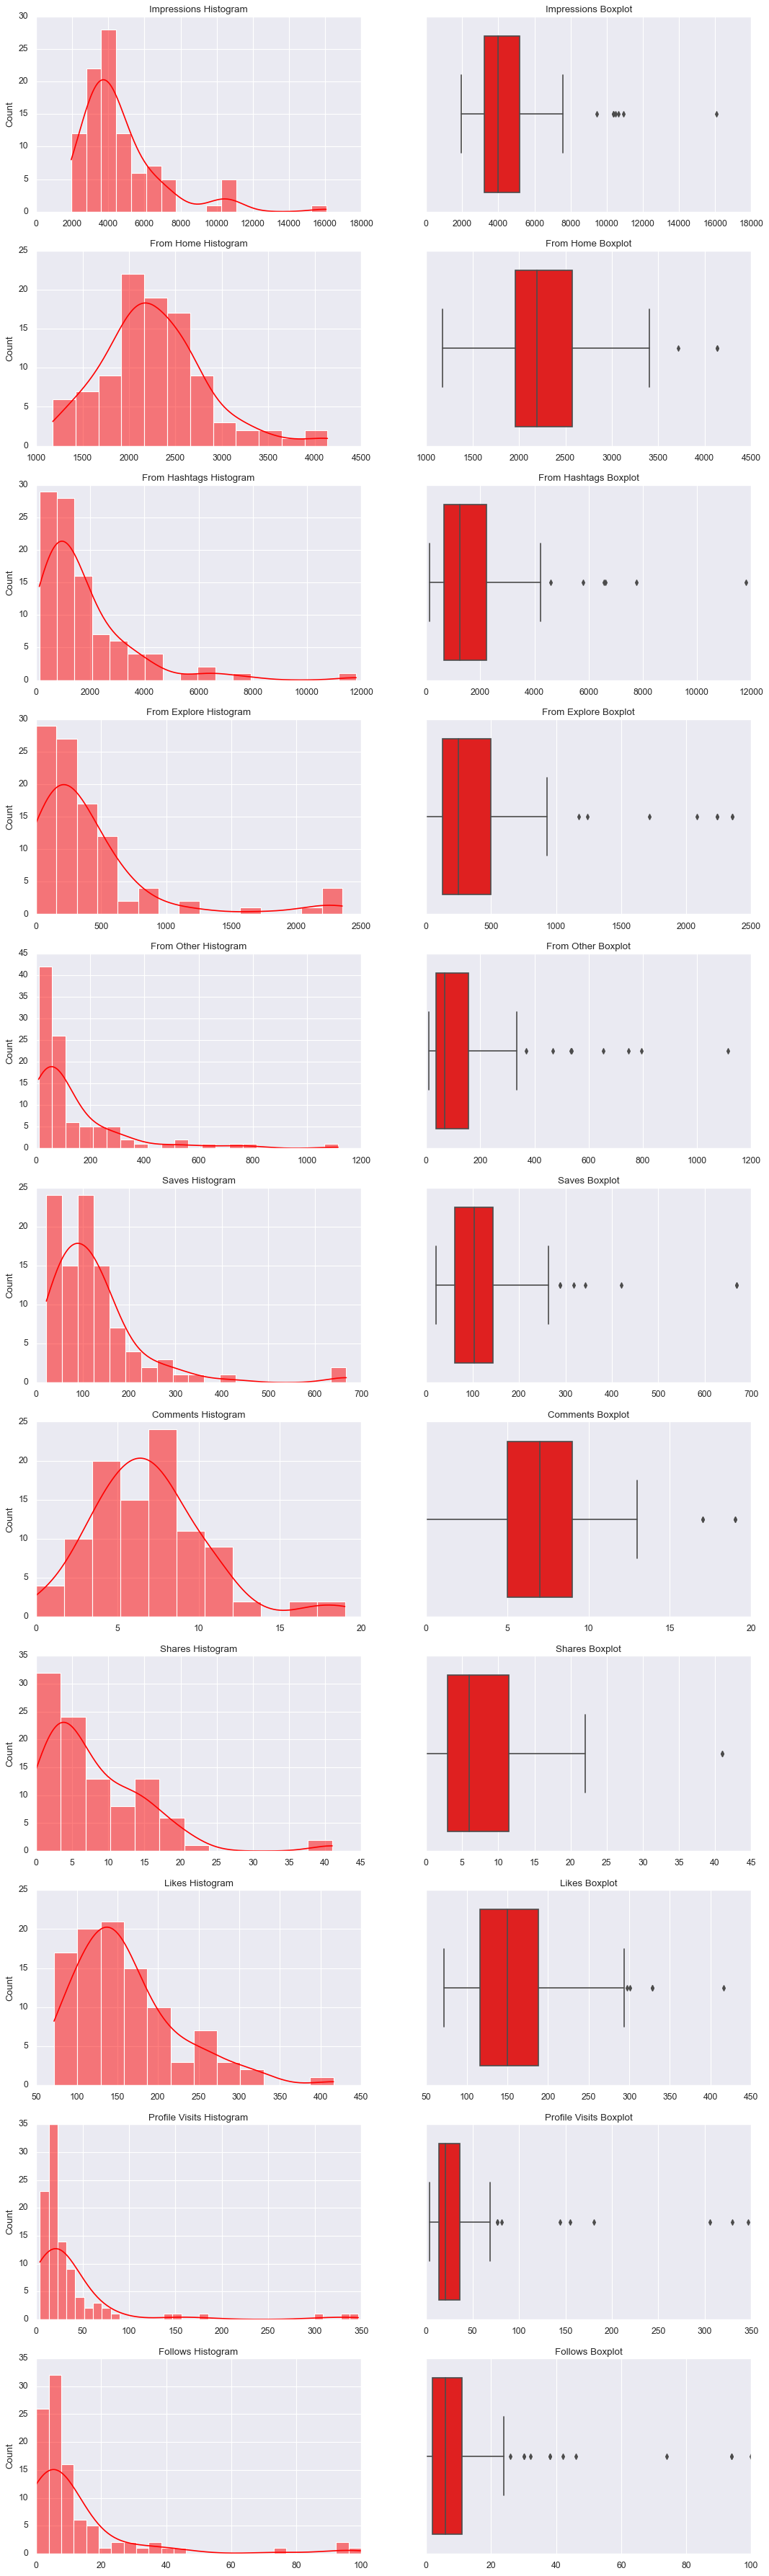

In [189]:
charts_count = len(columns_to_charts)
fig, axs = plt.subplots(ncols=2, nrows=charts_count, figsize=(16, 5*charts_count))
sns.set_style('darkgrid')
for i in range(charts_count):
    column = num_columns[i]
    sns.histplot(df[column], color='red', kde=True, ax=axs[i][0])
    sns.boxplot(df[column], color='red', ax=axs[i][1])
    axs[i][0].set_title(columns_mapping[column] + ' Histogram')
    axs[i][1].set_title(columns_mapping[column] + ' Boxplot')
    axs[i][0].set_xlabel('')
    axs[i][1].set_xlabel('')

## String columns

In [152]:
string_columns = ['caption', 'hashtags']

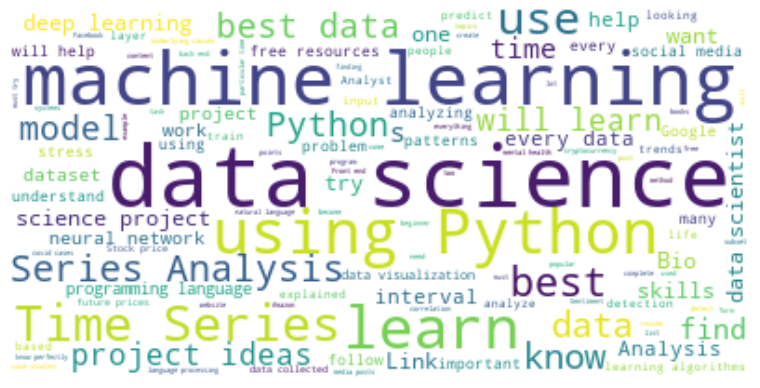

In [191]:
text = " ".join(i for i in df['caption'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

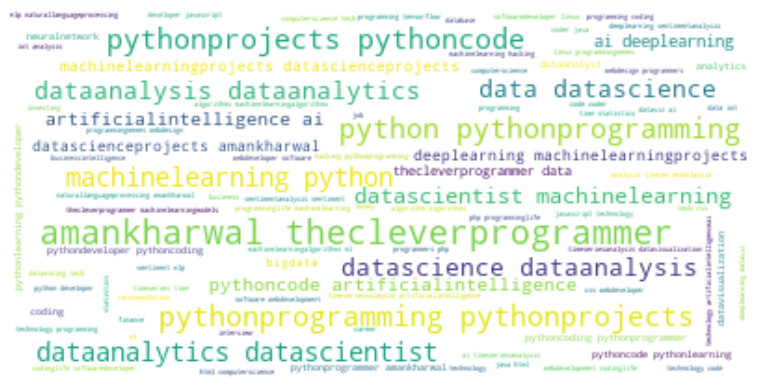

In [192]:
text = " ".join(i for i in df['hashtags'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see, the most frequently used phrases are: `data science`, `time_series`, `machin learning`, `python`

# Correlations

<AxesSubplot:>

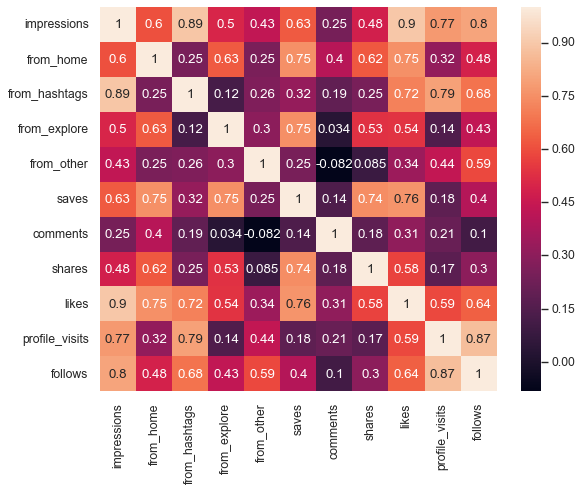

In [197]:
corr_matrix = df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True)

As we can see, there are some features, that correlates with other tags. Let's look closer at some charts

In [379]:
def draw_scatters(df, x, y):
    charts_count = len(y)
    fig, axs = plt.subplots(ncols=1, nrows=charts_count, figsize=(10, 4 * charts_count))
    for i in range(charts_count):
        sns.scatterplot(data=df, x=x, y=y[i], ax=axs[i], color='red')
        axs[i].set_title(columns_mapping[y[i]])
        axs[i].set_xlabel('')

## Impressions 

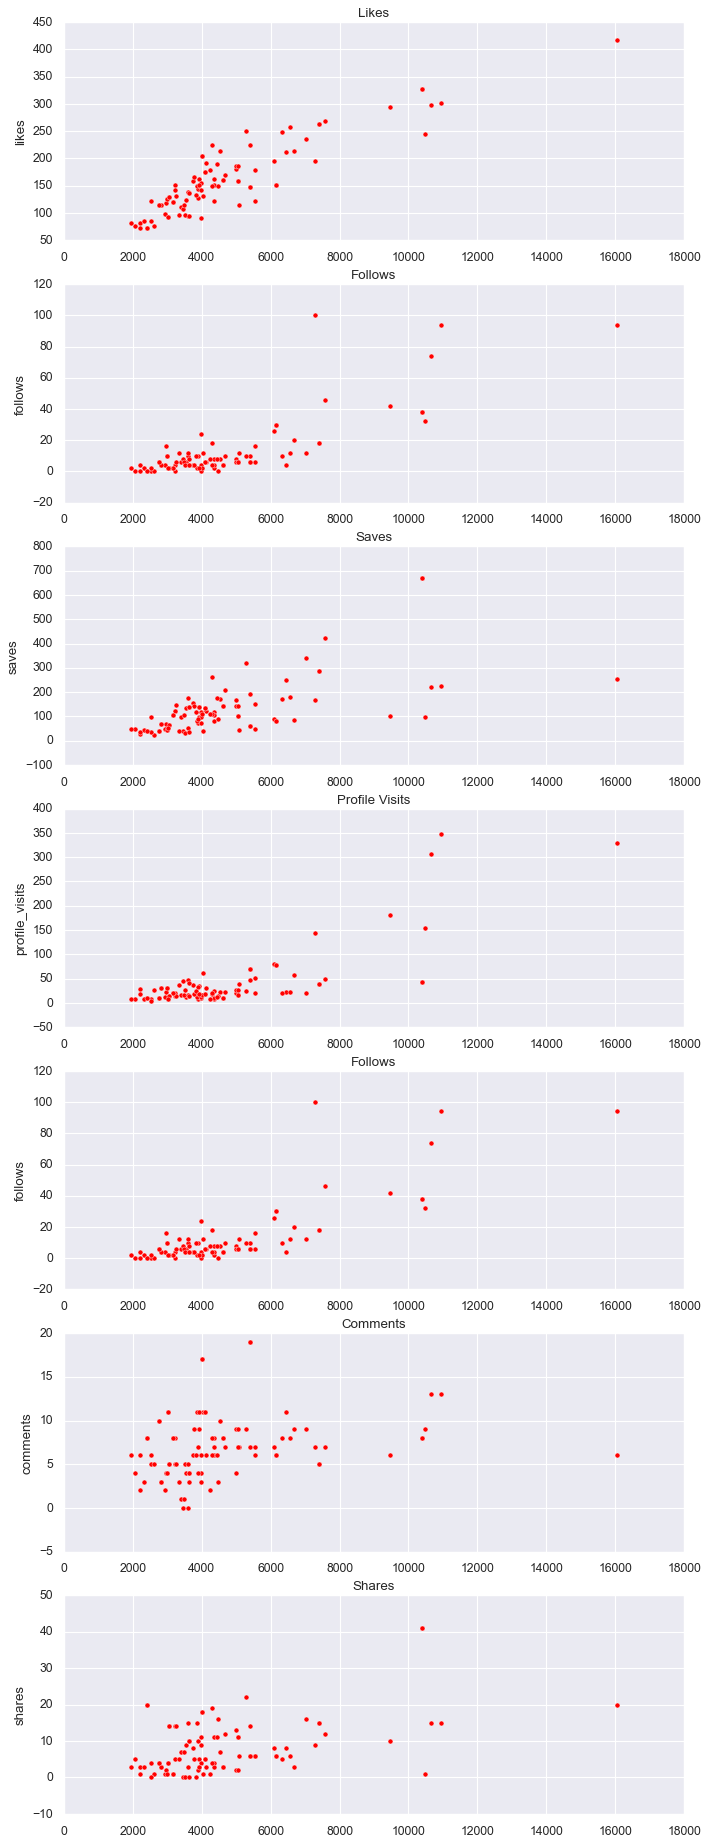

In [388]:
x = 'impressions'
y = ['likes', 'follows', 'saves', 'profile_visits', 'follows', 'comments', 'shares']
draw_scatters(df, x, y)

We can say that the more impressions, the more likes there will be. On the other hand, this is not guaranteed and most likely depends on other parameters in the aggregate.<br>
In the case of shares comments, we can say that there is no direct dependence.

## Likes

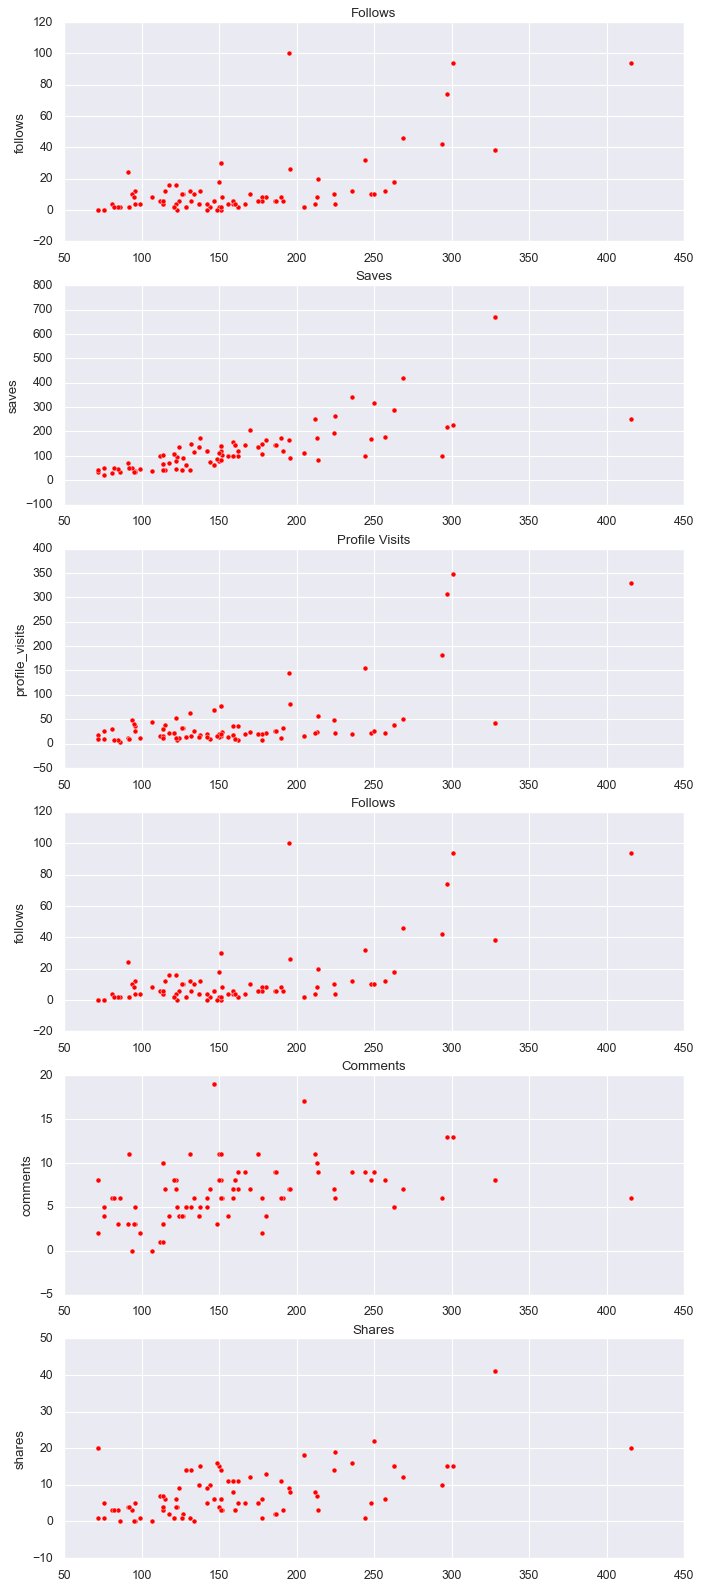

In [389]:
x = 'likes'
y = ['follows', 'saves', 'profile_visits', 'follows', 'comments', 'shares']
draw_scatters(df, x, y)

In the case of likes, we can say that there is a dependence, but very weak. The number of likes can be both large and small with the same value of other parameters<br>
But with an increase in the number of likes, the upper limit of the values of other characteristics increases.

# Try to Predict Likes

Lets try to predict likes<br>
First, we need to prepare features

In [307]:
target = 'likes'
features = num_columns.drop(target)

In [308]:
X = df[features]
y = df[target]

In [309]:
scaler = StandardScaler().fit(X)
X[features] = scaler.transform(X[features])

## Cross validation

In [334]:
models = {'Linear Regression' : LinearRegression(), 
          'Decision Tree' : DecisionTreeRegressor(random_state=SEED), 
          'Rendom Forest' : RandomForestRegressor(random_state=SEED)}
scores = []
for model in models:
    scores.append(cross_val_score(models[model], X, y, cv=6).mean())

In [339]:
pd.DataFrame(scores, index=list(models.keys()), columns=['Mean score'])

,Mean score
Linear Regression,0.818702
Decision Tree,0.710384
Rendom Forest,0.839341


## Feature importances

In [365]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)

### Linear regression 

In [366]:
model = LinearRegression().fit(train_X, train_y)
predictions = model.predict(test_X)
print('MAE :', mean_absolute_error(test_y, predictions))

MAE : 17.54310527037848


<AxesSubplot:>

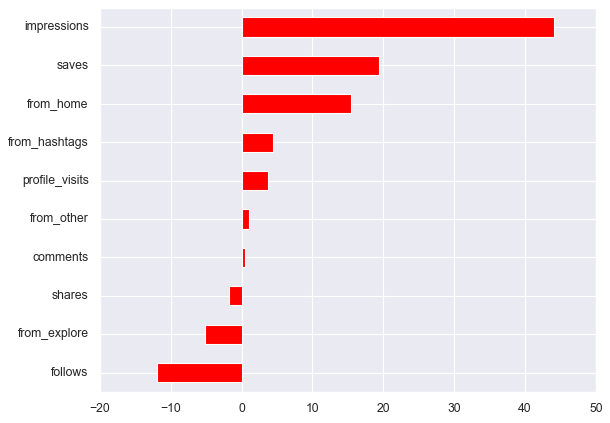

In [367]:
pd.Series(model.coef_, index=X.columns).sort_values().plot(kind='barh', color='red')

### Tree

In [368]:
model = DecisionTreeRegressor(random_state=SEED).fit(train_X, train_y)
predictions = model.predict(test_X)
print('MAE :', mean_absolute_error(test_y, predictions))

MAE : 13.55


<AxesSubplot:>

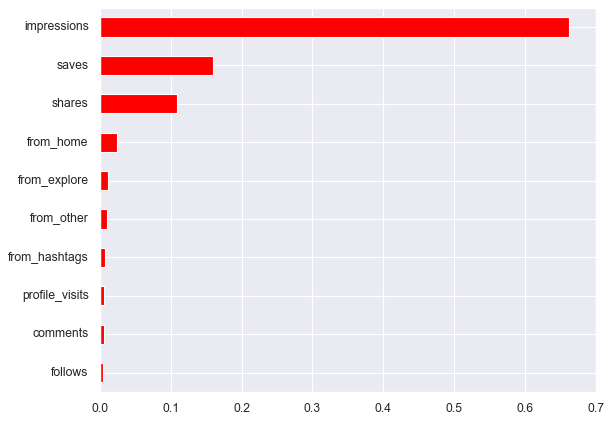

In [369]:
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='red')

### Forest

In [370]:
model = RandomForestRegressor(random_state=SEED).fit(train_X, train_y)
predictions = model.predict(test_X)
print('MAE :', mean_absolute_error(test_y, predictions))

MAE : 12.3005


<AxesSubplot:>

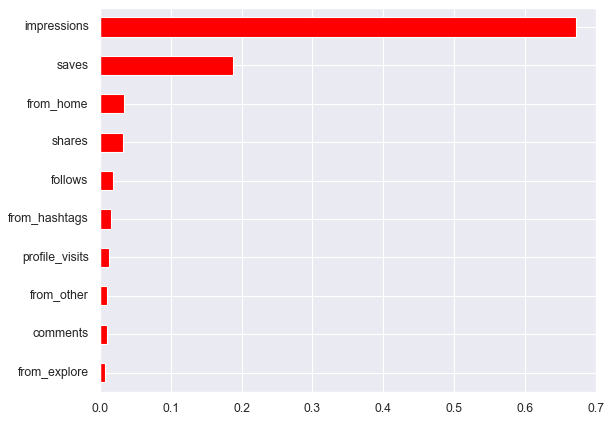

In [371]:
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='red')